In [1]:
import keras.utils.np_utils as np_utils
import matplotlib.patches as patches
import math
import matplotlib.pyplot as plt
import numpy as np

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_a_rectangle_hourglass(noise=0.0, free_location=False):
    figsize = 1.0
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise), generate_a_drawing(figsize, U, V, 0.0)


def generate_a_disk_hourglass(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise), generate_a_drawing(figsize, U, V, 0.0)

def generate_a_triangle_hourglass(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    imdata_noiseless = generate_a_drawing(figsize, U, V, 0.0)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]], imdata_noiseless]



def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1:
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3)
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

def generate_dataset_hourglass(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros((nb_samples,im_size))
    Y = np.zeros((nb_samples, im_size))
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i], Y[i] = generate_a_rectangle_hourglass(noise, free_location)
        elif category == 1:
            X[i], Y[i] = generate_a_disk_hourglass(noise, free_location)
        else:
            [X[i], V, Y[i]] = generate_a_triangle_hourglass(noise, free_location)
    X = (X + noise) / (255 + 2 * noise)
    Y = Y / 255
    return [X, Y]

if False and __name__ == "__main__":
    plt.figure(1)
    im = generate_a_rectangle(10, True)
    side = int(math.sqrt(im.size))
    plt.imshow(im.reshape(side,side), cmap='gray')
    plt.show()

    plt.figure(2)
    im = generate_a_disk(10)
    side = int(math.sqrt(im.size))
    plt.imshow(im.reshape(side,side), cmap='gray')
    plt.show()

    plt.figure(3)
    [im, v] = generate_a_triangle(20, False)
    side = int(math.sqrt(im.size))
    plt.imshow(im.reshape(side,side), cmap='gray')
    plt.show()

Using TensorFlow backend.


# Miniproject 1

1\.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from keras.models import Sequential
from keras.layers import (Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, Dropout,
                          BatchNormalization, LocallyConnected2D, GlobalAveragePooling2D,
                          SpatialDropout2D, UpSampling2D)
from keras.optimizers import SGD
from keras.utils import to_categorical
import keras.backend as K

In [3]:
# Generating training data

nb_samples = 300
noise = 20
X_train_class, Y_train_class = generate_dataset_classification(nb_samples, noise, free_location=False)

# Generating test data

nb_test_samples = 100
X_test_class, Y_test_class = generate_dataset_classification(nb_test_samples, noise, free_location=False)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90


In [4]:
X_train, Y_train, X_test, Y_test = X_train_class, Y_train_class, X_test_class, Y_test_class

In [5]:
# Creating the linear classifier with gradient descent

model = Sequential()

model.add(Dense(3, input_shape=X_train[0].shape))
model.add(Dropout(0.2))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.summary()


# Training the network

model.fit(X_train, to_categorical(Y_train, 3), epochs=10, batch_size=32,
          validation_data=(X_test, to_categorical(Y_test, 3)))

# Testing the model

prediction = model.predict(X_test)
acc = np.mean(Y_test == np.argmax(prediction, axis=-1))
print('The accuracy over test data: {}'.format(acc))

Train on 300 samples, validate on 100 samples
Epoch 1/10
300/300 [==============================] - 3s 10ms/step - loss: 6.2599 - acc: 0.4000 - val_loss: 5.2852 - val_acc: 0.4500
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 5.4626 - acc: 0.5267 - val_loss: 5.0068 - val_acc: 0.6900
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 5.4218 - acc: 0.5933 - val_loss: 5.2502 - val_acc: 0.6400
Epoch 4/10
300/300 [==============================] - ETA: 0s - loss: 4.8435 - acc: 0.607 - 1s 2ms/step - loss: 4.8162 - acc: 0.6133 - val_loss: 5.1360 - val_acc: 0.6500
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 4.9706 - acc: 0.6300 - val_loss: 4.9986 - val_acc: 0.6900
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 5.1413 - acc: 0.6167 - val_loss: 4.9979 - val_acc: 0.6900
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 4.6456 - acc: 0.6367 - val_loss: 7.7212 - val_acc

The gradient descent algorithm has a really slow convergence rate as it could have been expected.

In [6]:
# Creating the linear classifier with adam optimizer

model = Sequential()

model.add(Dense(3, input_shape=X_train[0].shape))
model.add(Dropout(0.2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training the network

model.fit(X_train, to_categorical(Y_train, 3), epochs=10, batch_size=32,
          validation_data=(X_test, to_categorical(Y_test, 3)))

# Testing the model

prediction = model.predict(X_test)
acc = np.mean(Y_test == np.argmax(prediction, axis=-1))
print('The accuracy over test data: {}'.format(acc))

Train on 300 samples, validate on 100 samples
Epoch 1/10
300/300 [==============================] - 2s 7ms/step - loss: 1.7626 - acc: 0.4000 - val_loss: 1.9312 - val_acc: 0.3100
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 1.1253 - acc: 0.5567 - val_loss: 0.5634 - val_acc: 0.7800
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.6998 - acc: 0.6367 - val_loss: 0.4341 - val_acc: 0.9200
Epoch 4/10
300/300 [==============================] - 1s 2ms/step - loss: 0.5292 - acc: 0.7367 - val_loss: 0.4487 - val_acc: 0.8000
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4384 - acc: 0.8167 - val_loss: 0.2888 - val_acc: 0.9900
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3564 - acc: 0.8500 - val_loss: 0.2801 - val_acc: 0.9100
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3532 - acc: 0.8633 - val_loss: 0.2516 - val_acc: 1.0000
Epoch 8/10
300/300 [==========

The convergence is way better with Adam and we get good results easily

3\.

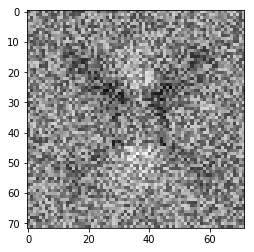

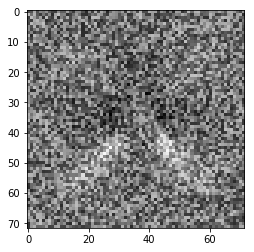

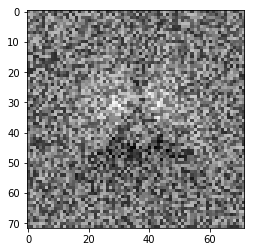

In [ ]:
weights = model.get_weights()

plt.figure(1)
im = weights[0][:,0]
side = int(math.sqrt(im.size))
plt.imshow(im.reshape(side, side), cmap='gray')
plt.show()

plt.figure(2)
im = weights[0][:,1]
side = int(math.sqrt(im.size))
plt.imshow(im.reshape(side, side), cmap='gray')
plt.show()

plt.figure(3)
im = weights[0][:,2]
side = int(math.sqrt(im.size))
plt.imshow(im.reshape(side, side), cmap='gray')
plt.show()

4\.

In [ ]:
# Generating training data

nb_samples = 300
noise = 20
X_train_class_free, Y_train_class_free = generate_dataset_classification(nb_samples, noise, free_location=True)

# Generating test data

X_test_class_free, Y_test_class_free = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [ ]:
X_train, Y_train, X_test, Y_test = X_train_class_free, Y_train_class_free, X_test_class_free, Y_test_class_free

In [ ]:
Xr_test = X_test.reshape(nb_samples, 72, 72, 1)
Xr_train = X_train.reshape(300, 72, 72, 1)

Xn_test = Xr_test.copy()
Xn_test -= np.mean(Xn_test, axis=(0, 1))
Xn_test /= np.sqrt(np.mean(Xn_test * Xn_test, axis=(0, 1)))

Xn_train = Xr_train.copy()
Xn_train -= np.mean(Xn_train, axis=(0, 1))
Xn_train /= np.sqrt(np.mean(Xn_train * Xn_train, axis=(0, 1)))

# Creating the convolutional classifier with adam optimizer

head = "conv"

model = Sequential()

model.add(Conv2D(20, kernel_size=(5, 5), padding="same", input_shape=(72, 72, 1)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.2))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same", strides=2))

model.add(Conv2D(40, kernel_size=(5, 5), padding="same"))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.2))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same", strides=2))

if head == "conv":
    model.add(LocallyConnected2D(3, kernel_size=(1, 1)))
    model.add(BatchNormalization())
    model.add(GlobalAveragePooling2D())
    model.add(Activation("softmax"))

if head == "dense":
    model.add(Flatten())
    model.add(Dense(3))
    model.add(Dropout(0.5))
    model.add(Activation("softmax"))
    
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training the network

model.fit(Xn_train, to_categorical(Y_train, 3), epochs=10, batch_size=32,
          validation_data=(Xn_test, Y_test))

# Testing the model

loss, acc = model.evaluate(Xn_test, Y_test)
print('The accuracy over test data: {}'.format(acc))

As we don't take a fixed position, we can't use a dense network, so we use a convolution one which is not affected by translations. I used the architecture described in the paper [Network in network](https://arxiv.org/abs/1312.4400) with the use of a global average pooling in the end instead of a dense. The results are pretty good with normalization and dropout to avoid overfitting (300 images is not a lot to train on)

In [ ]:
# Generating training data

nb_samples = 300
noise = 20
X_train_reg, Y_train_reg = generate_dataset_regression(nb_samples, noise)

# Generating test data

X_test_reg, Y_test_reg = generate_dataset_regression(300, noise)

In [ ]:
X_train, Y_train, X_test, Y_test = X_train_reg, Y_train_reg, X_test_reg, Y_test_reg

In [ ]:
def mse_acc(y_true, y_pred):
    return K.less_equal(K.abs(y_true - y_pred), 1.)

In [ ]:
Xr_test = X_test.reshape(nb_samples, 72, 72, 1)
Xr_train = X_train.reshape(300, 72, 72, 1)

Xn_test = Xr_test.copy()
Xn_test -= np.mean(Xn_test, axis=(0, 1))
Xn_test /= np.sqrt(np.mean(Xn_test * Xn_test, axis=(0, 1)))

Xn_train = Xr_train.copy()
Xn_train -= np.mean(Xn_train, axis=(0, 1))
Xn_train /= np.sqrt(np.mean(Xn_train * Xn_train, axis=(0, 1)))

# Creating the convolutional classifier with adam optimizer

head = "conv"

model = Sequential()

model.add(Conv2D(20, kernel_size=(5, 5), padding="same", input_shape=(72, 72, 1)))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.2))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same", strides=2))

model.add(Flatten())
model.add(Dense(6))
model.add(Dropout(0.5))
    
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[mse_acc])
#model.summary()


# Training the network

model.fit(Xn_train, Y_train, epochs=10, batch_size=32,
          validation_data=(Xn_test, Y_test))

# Testing the model

loss, acc = model.evaluate(Xn_test, Y_test)
print('The accuracy over test data: {}'.format(acc))

## Hourglass noise reduction

In [ ]:
# Generating training data

nb_samples = 300
noise = 20
X_train_hourglass, Y_train_hourglass = generate_dataset_hourglass(nb_samples, noise)

# Generating test data

X_test_hourglass, Y_test_hourglass = generate_dataset_hourglass(300, noise)

In [ ]:
X_train, Y_train, X_test, Y_test = X_train_hourglass, Y_train_hourglass, X_test_hourglass, Y_test_hourglass

X_train = X_train.reshape(300, 72, 72, 1)
Y_train = Y_train.reshape(300, 72, 72, 1)
X_test = X_test.reshape(300, 72, 72, 1)
Y_test = Y_test.reshape(300, 72, 72, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(5, 5), padding="same", input_shape=(72, 72, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(10, kernel_size=(5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same", strides=2))

model.add(Conv2D(20, kernel_size=(5, 5), padding="same", input_shape=(72, 72, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(30, kernel_size=(5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same", strides=2))

model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(30, kernel_size=(5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(20, kernel_size=(5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(2, kernel_size=(5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

In [ ]:
model.fit(X_train, to_categorical(Y_train), epochs=10, batch_size=32,
          validation_data=(X_test, to_categorical(Y_test)))